In [22]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Data preparation

#### Load data

In [23]:
data = pd.read_csv('Social_Network_Ads.csv', header = 0, encoding='utf8')

#### Explore data

In [24]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [26]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Data Preprocessing

In [27]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

#### Encode categorical features

In [28]:
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

#### Split train/test dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 103)
# test_size = 0.2 tức là kích thước tập test là 20%
# random_state nếu không khai báo thì mỗi khi chia sẽ ra 1 bộ tỷ lệ 80,20 nhưng không giống hệt nhau, random_state giúp cho chia ra 1 bộ giống nhau.
# Giá trị random_state = x, x bất kỳ. Chạy nhiều bộ random_state, để tìm một giá trị % trung bình

#### Normalize features

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model development

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### Train kNN model

In [36]:
clf = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2, algorithm = 'brute')
clf.fit(X_train, y_train)
# n_neighbors là k, metric = khoảng cách (minkowski), p = 2 -> Euclidean, algorithm = brute (brute force: vét cạn) còn nhiều cách khác

KNeighborsClassifier(algorithm='brute', n_neighbors=20)

#### Predict on Test set

In [37]:
y_pred = clf.predict(X_test)

#### Evaluate kNN classifier

In [38]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy: {}'.format(ac))

Accuracy: 0.9375


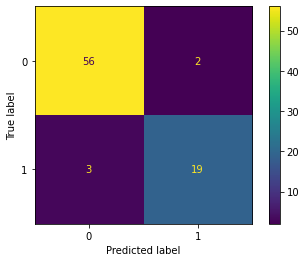

Confusion Matrix


In [40]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()
print('Confusion Matrix')

#### Optional: Finding optimal k

Optimal k: 20


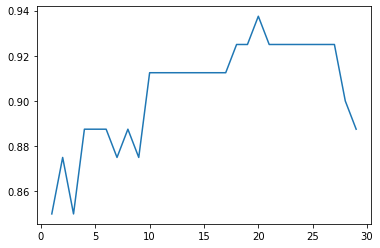

In [34]:
# Calculate accuracy scores corresponding to k
accuracy_scores = {}
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2, algorithm = 'brute')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores[i] = accuracy_score(y_test,y_pred)

# Plot accuracy scores
plt.plot(list(accuracy_scores.keys()),list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))

##### Homework: Dùng matplot về để vẽ đồ thị